## ***// MEMPREDIKSI KANKER PARU-PARU LEBIH AWAL: POTENSI ALGORITMA SUPPORT VECTOR MACHINE //***

In [39]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

In [ ]:
pip uninstall scikit-learn

In [41]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [42]:
# Replace 'path/to/file.csv' with the actual path to your file
df = pd.read_csv('survey lung cancer.csv')

# Dataset Serangan
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [43]:
df.shape

(309, 16)

In [44]:
#Checking for Duplicates
df.duplicated().sum()

33

In [45]:
#Removing Duplicates
df=df.drop_duplicates()

In [46]:
#Checking for null values
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            276 n

In [48]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [49]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['GENDER']=le.fit_transform(df['GENDER'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])
df['SMOKING']=le.fit_transform(df['SMOKING'])
df['YELLOW_FINGERS']=le.fit_transform(df['YELLOW_FINGERS'])
df['ANXIETY']=le.fit_transform(df['ANXIETY'])
df['PEER_PRESSURE']=le.fit_transform(df['PEER_PRESSURE'])
df['CHRONIC DISEASE']=le.fit_transform(df['CHRONIC DISEASE'])
df['FATIGUE ']=le.fit_transform(df['FATIGUE '])
df['ALLERGY ']=le.fit_transform(df['ALLERGY '])
df['WHEEZING']=le.fit_transform(df['WHEEZING'])
df['ALCOHOL CONSUMING']=le.fit_transform(df['ALCOHOL CONSUMING'])
df['COUGHING']=le.fit_transform(df['COUGHING'])
df['SHORTNESS OF BREATH']=le.fit_transform(df['SHORTNESS OF BREATH'])
df['SWALLOWING DIFFICULTY']=le.fit_transform(df['SWALLOWING DIFFICULTY'])
df['CHEST PAIN']=le.fit_transform(df['CHEST PAIN'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])

In [50]:
#Let's check what's happened now
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,0,1,1,1,0,0,1,1,0,1,0,1,0,1
280,0,59,1,0,0,0,1,1,1,0,0,0,1,0,0,0
281,1,55,1,0,0,0,0,1,1,0,0,0,1,0,1,0
282,1,46,0,1,1,0,0,0,0,0,0,0,0,1,1,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 276 non-null    int32
 1   AGE                    276 non-null    int64
 2   SMOKING                276 non-null    int64
 3   YELLOW_FINGERS         276 non-null    int64
 4   ANXIETY                276 non-null    int64
 5   PEER_PRESSURE          276 non-null    int64
 6   CHRONIC DISEASE        276 non-null    int64
 7   FATIGUE                276 non-null    int64
 8   ALLERGY                276 non-null    int64
 9   WHEEZING               276 non-null    int64
 10  ALCOHOL CONSUMING      276 non-null    int64
 11  COUGHING               276 non-null    int64
 12  SHORTNESS OF BREATH    276 non-null    int64
 13  SWALLOWING DIFFICULTY  276 non-null    int64
 14  CHEST PAIN             276 non-null    int64
 15  LUNG_CANCER            276 non-null    int64


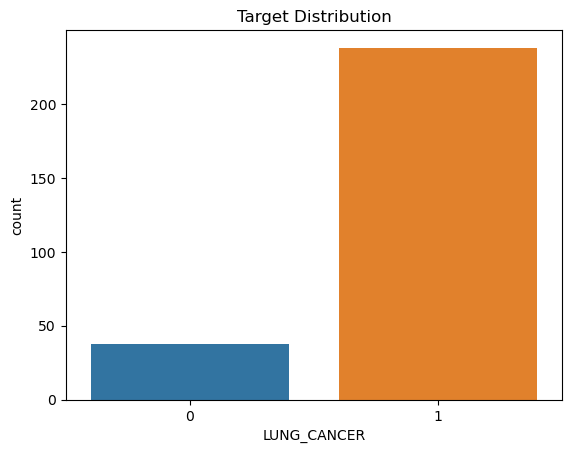

In [52]:
#Let's check the distributaion of Target variable.
sns.countplot(x='LUNG_CANCER', data=df,)
plt.title('Target Distribution');

In [53]:
df['LUNG_CANCER'].value_counts()

LUNG_CANCER
1    238
0     38
Name: count, dtype: int64

In [54]:
# function for plotting
def plot(col, df=df):
    return df.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))

<Axes: xlabel='GENDER'>

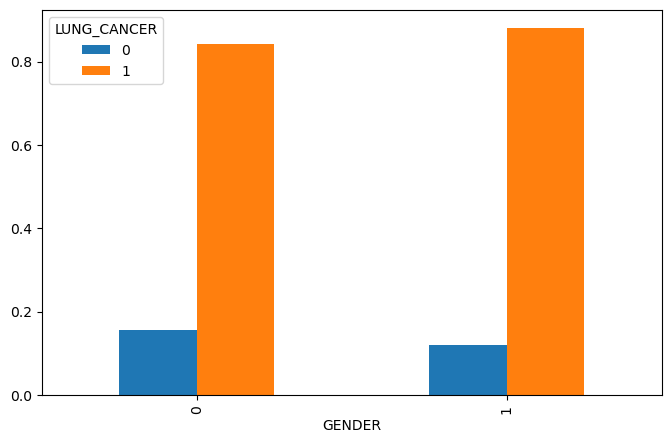

In [55]:
plot('GENDER')

<Axes: xlabel='AGE'>

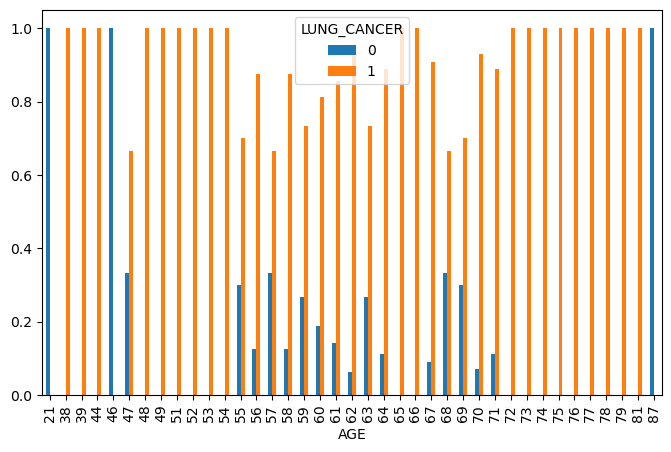

In [56]:
plot('AGE')

<Axes: xlabel='SMOKING'>

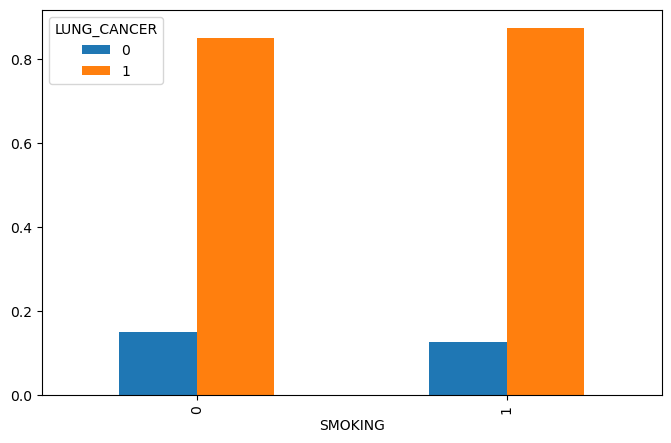

In [57]:
plot('SMOKING')

<Axes: xlabel='YELLOW_FINGERS'>

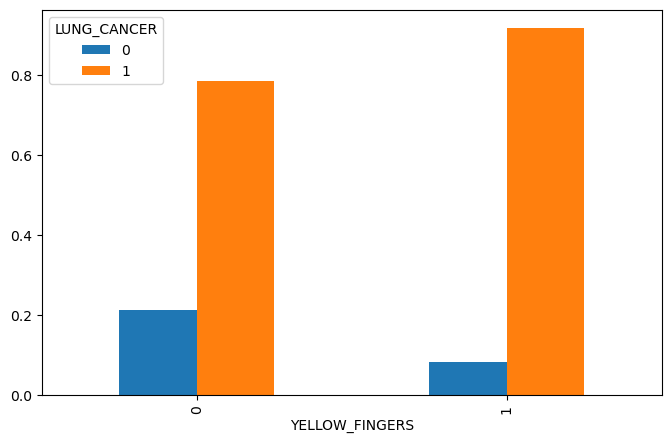

In [58]:
plot('YELLOW_FINGERS')

<Axes: xlabel='ANXIETY'>

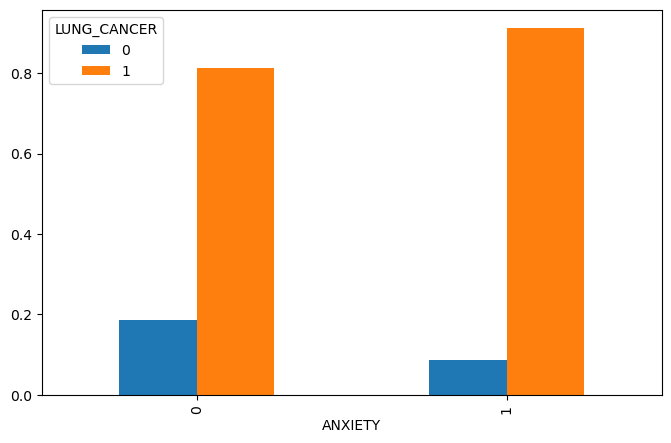

In [59]:
plot('ANXIETY')

<Axes: xlabel='PEER_PRESSURE'>

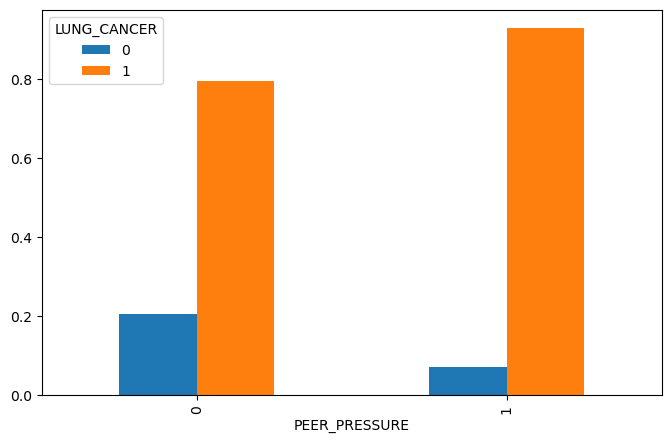

In [60]:
plot('PEER_PRESSURE')

<Axes: xlabel='CHRONIC DISEASE'>

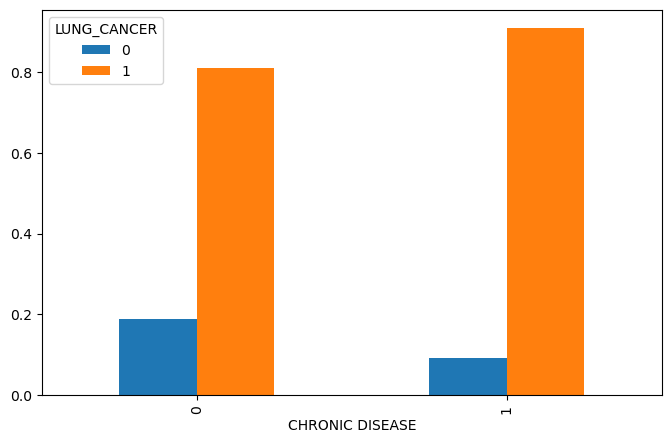

In [61]:
plot('CHRONIC DISEASE')

<Axes: xlabel='FATIGUE '>

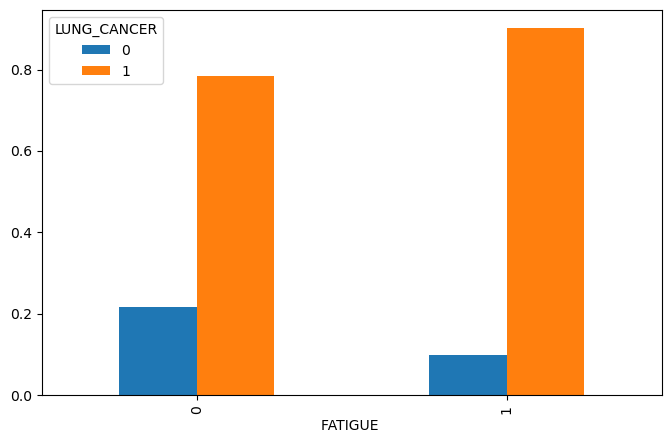

In [62]:
plot('FATIGUE ')

<Axes: xlabel='ALLERGY '>

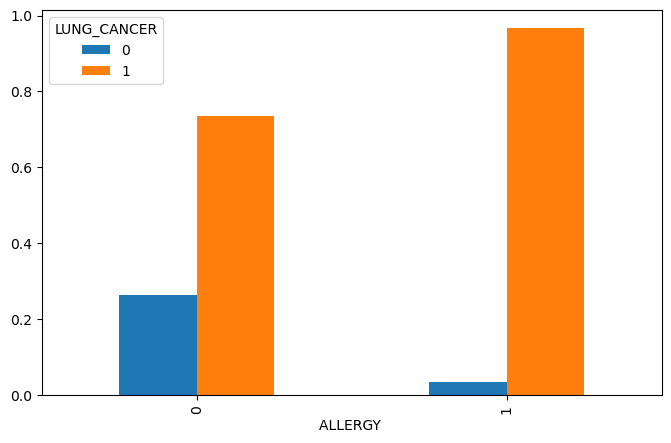

In [63]:
plot('ALLERGY ')

<Axes: xlabel='WHEEZING'>

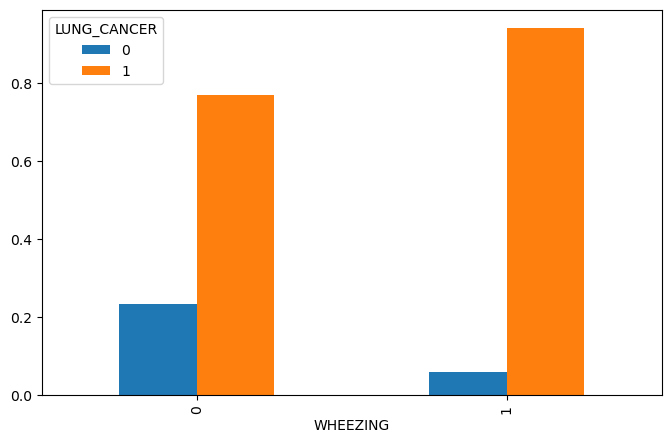

In [64]:
plot('WHEEZING')

<Axes: xlabel='ALCOHOL CONSUMING'>

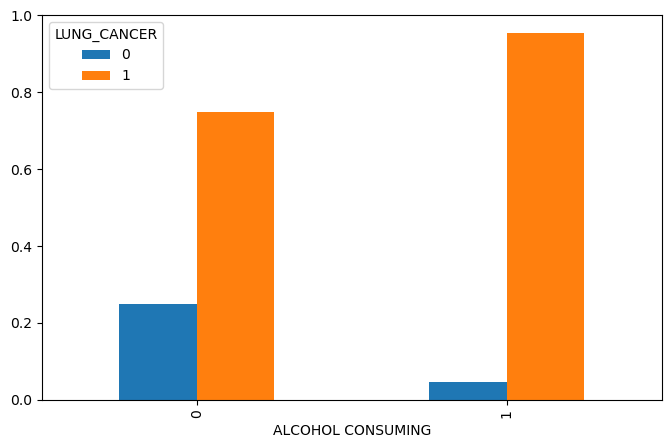

In [65]:
plot('ALCOHOL CONSUMING')

<Axes: xlabel='COUGHING'>

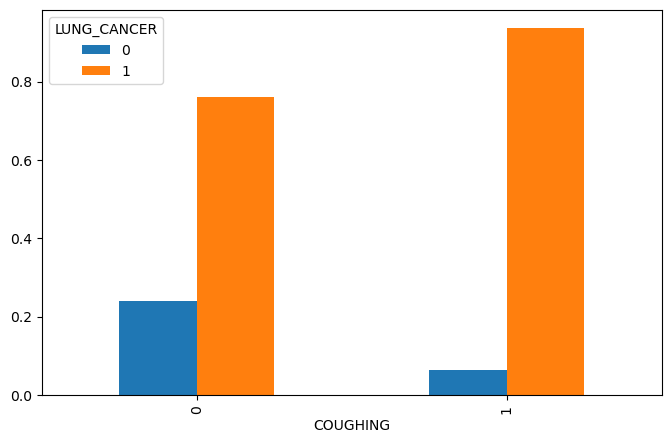

In [66]:
plot('COUGHING')

<Axes: xlabel='SHORTNESS OF BREATH'>

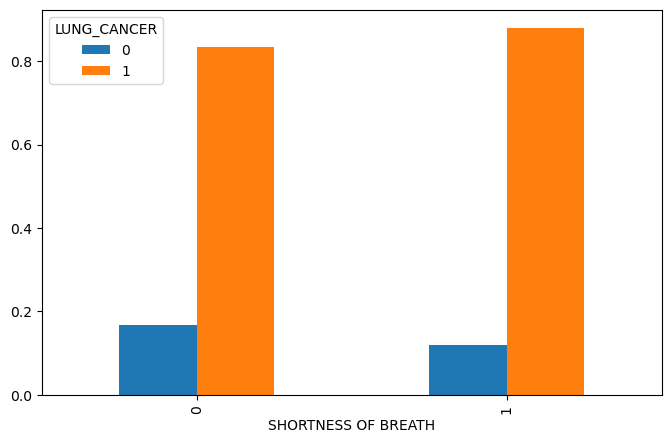

In [67]:
plot('SHORTNESS OF BREATH')

<Axes: xlabel='SWALLOWING DIFFICULTY'>

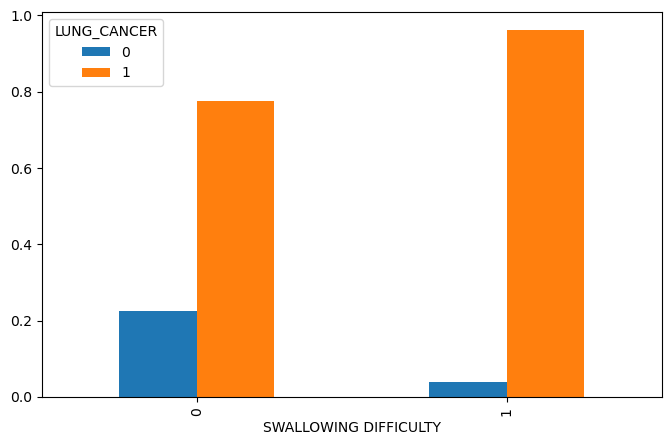

In [68]:
plot('SWALLOWING DIFFICULTY')

<Axes: xlabel='CHEST PAIN'>

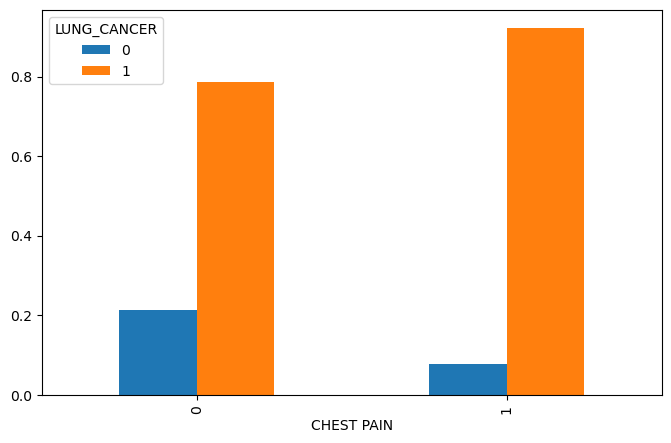

In [69]:
plot('CHEST PAIN')

### Dropping Kolom

> Dengan menghapus kolom `GENDER`, `AGE`, `SMOKING`, dan `SHORTNESS OF BREATH`, kita berharap dapat membangun model yang lebih efisien dan fokus pada fitur-fitur yang lebih relevan.



In [70]:
df_new=df.drop(columns=['GENDER','AGE', 'SMOKING', 'SHORTNESS OF BREATH'])
df_new

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,1,0,0,1,0,1,1,1,1,1,1
1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,0,1,0,1,0,1,0,1,0,1,0
3,1,1,0,0,0,0,0,1,0,1,1,0
4,1,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,1,1,0,0,1,1,0,1,1,0,1
280,0,0,0,1,1,1,0,0,0,0,0,0
281,0,0,0,0,1,1,0,0,0,0,1,0
282,1,1,0,0,0,0,0,0,0,1,1,0


In [71]:
#Finding Correlation
cn=df_new.corr()
cn

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
YELLOW_FINGERS,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,0.333349,-0.099169,0.189192
ANXIETY,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,0.478820,-0.123182,0.144322
PEER_PRESSURE,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,0.327764,-0.074655,0.195086
CHRONIC DISEASE,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,0.068263,-0.048895,0.143692
FATIGUE,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,-0.115727,0.013757,0.160078
ALLERGY,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.037581,0.245440,0.333552
WHEEZING,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.108304,0.142846,0.249054
ALCOHOL CONSUMING,-0.273643,-0.152228,-0.132603,0.010144,-0.181573,0.378125,0.261061,1.000000,0.198023,-0.000635,0.310767,0.294422
COUGHING,0.020803,-0.218843,-0.068224,-0.160813,0.148538,0.206367,0.353657,0.198023,1.000000,-0.136885,0.077988,0.253027
SWALLOWING DIFFICULTY,0.333349,0.478820,0.327764,0.068263,-0.115727,-0.037581,0.108304,-0.000635,-0.136885,1.000000,0.102674,0.268940


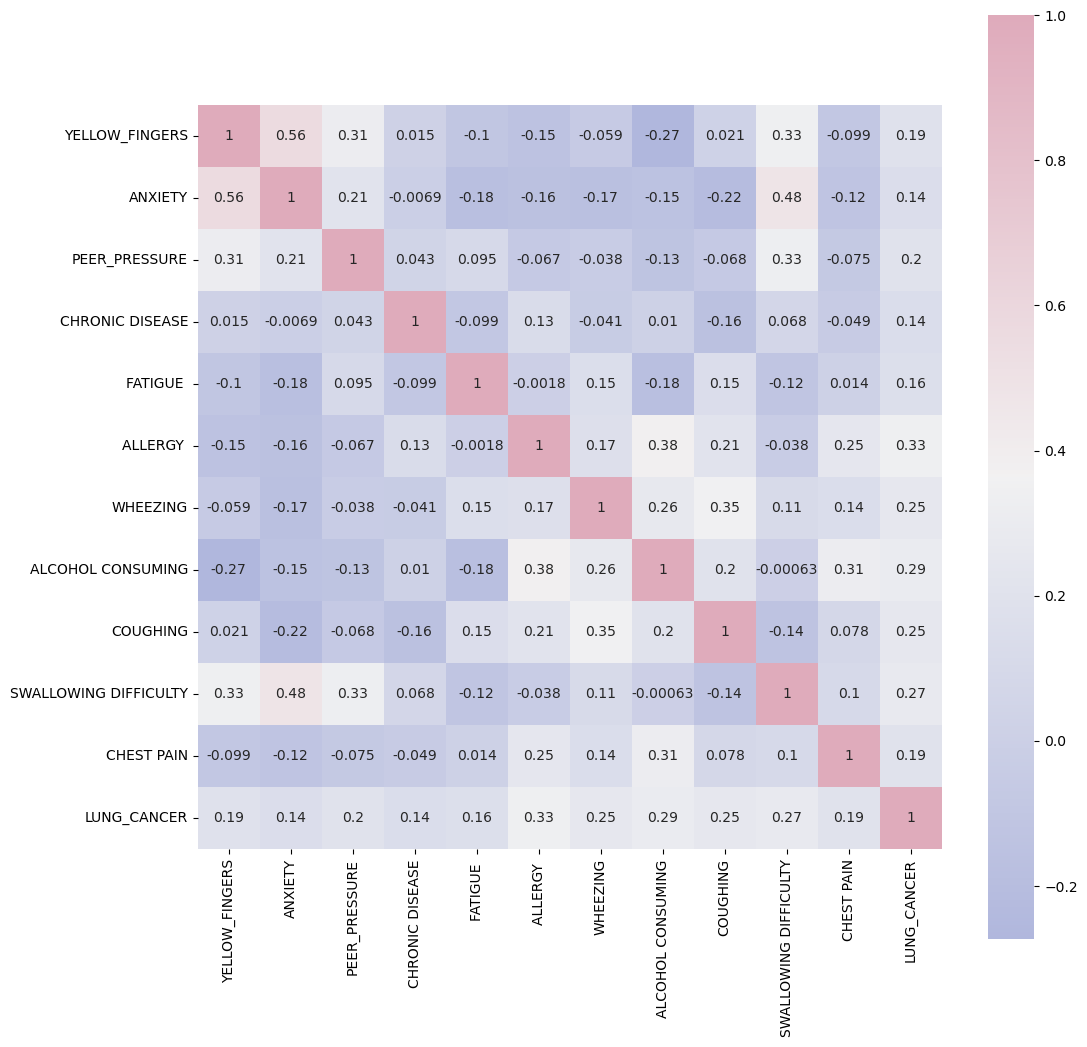

In [72]:
#Correlation
cmap=sns.diverging_palette(260,-10,s=50, l=75, n=6,
as_cmap=True)
plt.subplots(figsize=(12,12))
sns.heatmap(cn,cmap=cmap,annot=True, square=True)
plt.show()

### Penggabungan & Penambahan Kolom

In [73]:
df_new['ANXYELFIN']=df_new['ANXIETY']*df_new['YELLOW_FINGERS']
df_new

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,ANXYELFIN
0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,0,0,1,1,1,0,0,0,1,1,1,0
2,0,0,1,0,1,0,1,0,1,0,1,0,0
3,1,1,0,0,0,0,0,1,0,1,1,0,1
4,1,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,1,1,0,0,1,1,0,1,1,0,1,1
280,0,0,0,1,1,1,0,0,0,0,0,0,0
281,0,0,0,0,1,1,0,0,0,0,1,0,0
282,1,1,0,0,0,0,0,0,0,1,1,0,1


In [74]:
# # Save to Excel file
# save = df_new.to_csv('/content/drive/My Drive/Dataset/data_bersih.csv', index=False)
# save

### Split

In [75]:
#Splitting independent and dependent variables
X = df_new.drop('LUNG_CANCER', axis = 1)
y = df_new['LUNG_CANCER']

### Parameter Adasyn


In [76]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X, y = adasyn.fit_resample(X, y)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\ASUS PC\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)#splitting data in 80% train, 20%test

print("Train :", X_train.shape,y_train.shape)

print('Test :',X_test.shape,y_test.shape)

### Modelling

In [ ]:
#Fitting SVC to the training set
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

In [ ]:
#Predicting result using testing data
y_svc_pred= svc_model.predict(X_test)
y_svc_pred

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_svc_pred)

In [ ]:
#Model accuracy
from sklearn.metrics import classification_report, accuracy_score, f1_score
svc_cr=classification_report(y_test, y_svc_pred)
print(svc_cr)


### Evaluasi

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score
print("accuracy score:", (accuracy_score(y_svc_pred, y_test))*100, "%")

### Confusion Matrix

In [ ]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Lung Cancer Prediction")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Deployment

### Make predictions using the loaded model

In [ ]:
X=df_new.iloc[:,0:2].values
y=df_new.iloc[:,2].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state = 42)

In [ ]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

In [ ]:
y_svc_pred= svc_model.predict(X_test)
y_svc_pred
from sklearn.metrics import mean_squared_error
import numpy as np
nilaimse=mean_squared_error(y_svc_pred,y_test)
nilairmse=np.sqrt(nilaimse)
print(nilaimse)
print(nilairmse)


In [ ]:
import matplotlib.pyplot as plt
l = range(len(X_test))
plt.plot(l, y_test, color = 'red')
plt.plot(l, y_svc_pred, color = 'blue')
plt.title('Hasil Prediksi Kanker Paru Paru')
plt.xlabel('Data Variabel X')
plt.ylabel('LUNG_CANCER')
plt.show()

### Save model using pickle

In [ ]:
import pickle
pd.to_pickle(final_model, "LC1.pickle")